# Algoritam K-sredina

Algoritam `k-sredina` (engl. k-means) pronalazi `k` klastera u skupu podataka. Svaki od klastera je predstavljen pomoću centroide koja se dobija uprosečavanjem instanci koje sadrži. 

Polaznih `k` centroida se bira nasumično, a potom se ponavljaju sledeći koraci:

1. instance se raspoređuju u nove klastere tako što se svaka instanca pridruži najbližoj centroidi

2. izračunavaju se nove centroide kao prosek instanci koje su im pridružene


Ovi koraci se izvršavaju sve dok se centroide menjaju. Kada su centroide iste u dve uzastopne iteracije, algoritam se zaustavlja.

Ukoliko korisnik zna nešto o strukturi svojih podataka, početni centroidi se mogu i pažljivije odabrati.

<img src='assets/k-means.png'>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

`Scikit-learn` biblioteka omogućava korišćenje algortima k-sredina kroz `KMeans` klasu `cluster` paketa.

In [2]:
from sklearn.cluster import KMeans

Sledeći skup sadrži dva klastera podataka - prvi klaster prati x-koordinatu sa vrednošću 1, a drugi x-koordinatu sa vrednošću 10.

In [3]:
data = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])

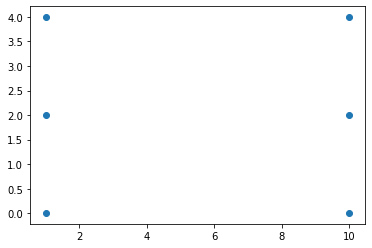

In [4]:
plt.scatter(data[:, 0], data[:, 1])
plt.show()

`KMeans` funkcija očekuje broj klastera i inicijalizaciju kojom se utiče na izbor početnih centroida. Postoje i druga podešavanja algoritma kroz maksimalan broj iteracija, izbor pozadinskog algoritma, paralelizaciju i slično. Ovako kreirani model poštuje `fit - predict` princip rada metoda nadgledanog učenja koje smo upoznali u uvodnom delu kursa. 

In [5]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

Obeležja pripisana instancama se mogu pročitati kroz `labels_` svojstvo naučenog modela ili pozivom funkcije `predict`.

In [6]:
kmeans.labels_

array([1, 1, 1, 0, 0, 0], dtype=int32)

In [7]:
labels_predicted = kmeans.predict(data)
labels_predicted

array([1, 1, 1, 0, 0, 0], dtype=int32)

Informacije o centroidima klastera se mogu dobiti pomoću svojstva `cluster_centers_`.

In [8]:
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

In [9]:
kmeans.cluster_centers_[0][0]

10.0

Ako labelama pridružimo boje, možemo prikazati i kako dobijeni klasteri izgledaju. 

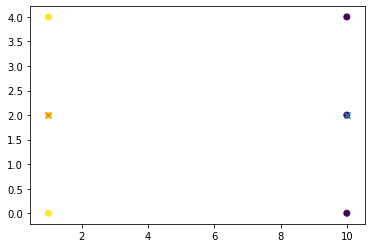

In [10]:
plt.scatter(data[:, 0], data[:, 1], c=labels_predicted)
plt.scatter(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], marker='x')
plt.scatter(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], marker='x')

Obeležja novih instanci takođe dobijamo korišćenjem `predict` metode.

In [11]:
kmeans.predict([[0, 0], [12, 3]])

array([1, 0], dtype=int32)

## Odabir parametra `k` za broj klastera

U praksi obično radimo sa većim skupovima podataka u kojima nije baš uvek intuitivno pretpostaviti broj postojećih klastera. Optimalan broj klastera određujemo tako što pratimo ponašanje modela za različite vrednosti ovog parametra, a potom odaberemo najoptimalniju tj. onu za koju se dobija najmanja vrednost funkcije cilja. 

<img src='assets/k-means_objective.png'>

Funkcija `make_blobs` biblioteke scikit-learn omogućava kreiranje testnih skupova podataka. Njeni argumenti su ukupan broj instanci skupa (`n_samples` parametar), veličina prostora atributa (`n_features` parametar), broj centroida tj. klastera (`centers` parametar) i parametar kojim se utiče na izbor njihovog raspoređivanja (`random_state` parametar). Povratne vrednosti funkcije su generisani skup podataka oblika `n_samples x n_features` i njima pridružene labele.

In [12]:
from sklearn.datasets import make_blobs

In [13]:
X, y = make_blobs(n_samples=100, n_features=2, centers=4, random_state=6)

In [14]:
X.shape

(100, 2)

In [15]:
y

array([3, 1, 0, 2, 1, 3, 1, 3, 2, 3, 0, 2, 3, 2, 0, 2, 0, 1, 0, 2, 0, 1,
       3, 0, 0, 2, 1, 1, 3, 3, 0, 2, 3, 1, 0, 2, 1, 1, 3, 3, 0, 3, 2, 2,
       2, 1, 3, 0, 2, 2, 1, 1, 1, 1, 1, 0, 0, 2, 3, 0, 0, 3, 0, 3, 2, 1,
       3, 1, 2, 0, 2, 3, 0, 2, 0, 0, 1, 2, 0, 3, 2, 2, 0, 1, 1, 3, 2, 3,
       2, 1, 0, 1, 1, 1, 2, 3, 3, 0, 3, 3])

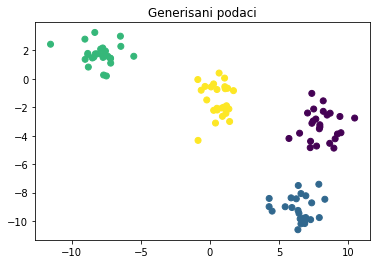

In [16]:
plt.title('Generisani podaci')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.show()

Tražićemo optimalni broj klastera u opsegu od 1 do 10.

In [17]:
Ks = range(1, 10)

Zatim ćemo za svaku vrednost parametra `k` kreirati poseban model i oceniti ga. Ocenu ćemo dobiti korišćenjem bibliotečke funkcije `score` kojom se dobija negativna vrednost funkcije cilja. 

In [18]:
kms = [KMeans(n_clusters=i, random_state=7) for i in Ks]
score = [km.fit(X).score(X) for km in kms]

Sada možemo generisati grafik dobijenih ocena. 

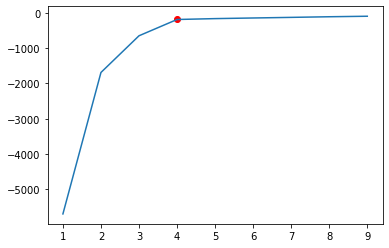

In [19]:
plt.plot(Ks, score)
plt.scatter(4, score[3], c='red')
plt.show()

Možemo da zaključimo da je `k = 4` najbolja vrednost jer se nakon toga funkcija cilja stabilizuje, a pre toga ima značajno nepoželjnije vrednosti.

Prikazaćemo rezultate koji se dobijaju korišćenjem ovog modela.

In [20]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
y_predicted = kmeans.predict(X)

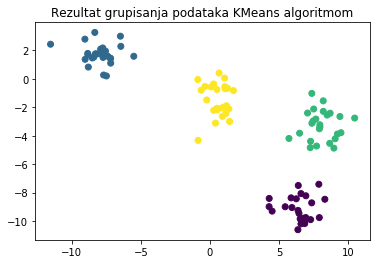

In [22]:
plt.title('Rezultat grupisanja podataka KMeans algoritmom')
plt.scatter(X[:, 0], X[:, 1], c=y_predicted, cmap='viridis')
plt.show()